In [222]:
import geopandas as gpd
import pandas as pd 
import matplotlib.pyplot as plt 
import contextily

In [223]:
import os
os.getcwd()

'C:\\Users\\Admin'

## Part 1

In [224]:
#1) Total # of reported COVID-19 cases in the USA

usa = pd.read_csv("C:\\Users\\Admin\\Downloads\\project_covid19.csv")

usa = usa.melt(id_vars=['UID',
                     'iso2',
                     'iso3',
                     'code3',
                     'FIPS',
                     'Admin2',
                     'Province_State', 
                     'Country_Region', 
                     'Lat',
                     'Long_',
                     'Combined_Key'],
                    var_name='date',
                    value_name='cases')

usa = usa[usa.iso3 == 'USA'].copy()

usa['date'] = pd.to_datetime(usa.date)
usa = usa[usa.date == usa.date.max()] 

usa['cases'].sum()


31791828

In [225]:
#2) Total # of reported COVID-19 cases in Virginia

va = usa[usa['Province_State'] == 'Virginia'].copy()

va['cases'].sum()


650981

Text(0, 0.5, 'Daily Cases')

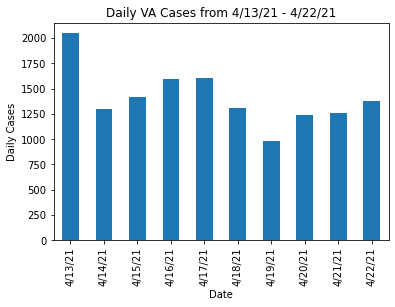

In [226]:
#3) Bar chart of NEW reported cases in VA over last 10 days

va_df_2 = df[df['Province_State'] == 'Virginia']

last_11 = va_df_2[va_df_2.columns[-11:]]

last_11_diff = last_11.diff(axis=1)

last_11_diff.drop('4/12/21', axis=1, inplace=True)

first_8 = va_df_2[va_df_2.columns[:8]]


out_df = first_8.join(last_11_diff)

daily_sums = [] 
dates = last_11_diff.columns.to_list()

for col in last_11_diff:
    daily_sums.append(last_11_diff.loc[:,col].sum())


daily_sums_series = pd.Series(daily_sums, index=dates)


ax = daily_sums_series.plot(kind='bar', 
                       title='Daily VA Cases from 4/13/21 - 4/22/21')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Cases')

In [237]:
#4) VA county with highest reported total cases

va_df = df[df['Province_State'] == 'Virginia'].copy()

sorted_va_df = va_df.sort_values(by='4/22/21').copy()
num_4 = sorted_va_df.iloc[-1:].copy()

print("{} is the VA county with the highest cumulative covid cases of: {}".format(num_4.loc[3047, 'Admin2'],num_4.loc[3047, '4/22/21'] ))

Fairfax is the VA county with the highest cumulative covid cases of: 74988


In [228]:
#5) Fairfax county's highest reported cases in 1 day

ffx_df = df[df['Admin2'] == 'Fairfax'].copy()

print("The most new cases in a day for Fairfax county occurred on {}.".format(ffx_df.iloc[:,11:].diff(axis=1).idxmax(axis=1).to_list()))
print("The new cases reported for that day was: {}".format(ffx_df.iloc[:,11:].diff(axis=1).max(axis=1).to_list()))

The most new cases in a day for Fairfax county occurred on ['1/17/21'].
The new cases reported for that day was: [1485.0]


In [229]:
#6) Total and AVG # of NEW cases reported in March 2021 for Fairfax,VA

dates_in_march = ['3/1/21','3/2/21','3/3/21','3/4/21','3/5/21','3/6/21','3/7/21',
                  '3/8/21','3/9/21','3/10/21','3/11/21','3/12/21','3/13/21',
                  '3/14/21','3/15/21','3/16/21','3/17/21','3/18/21','3/19/21',
                  '3/20/21','3/21/21','3/22/21','3/23/21','3/24/21','3/25/21',
                  '3/26/21','3/27/21','3/28/21','3/29/21','3/30/21','3/31/21']


march_ffx_df = ffx_df[ffx_df.columns.intersection(dates_in_march)].copy()


march_1_cases = march_ffx_df.loc[:,'3/1/21'].to_list()

march_31_cases = march_ffx_df.loc[:,'3/31/21'].to_list()


ffx_march_cases = march_31_cases[0] - march_1_cases[0]
print("Total number of new cases in March 2021 in Fairfax County was: {}".format(ffx_march_cases))


march_ffx_diff_df = march_ffx_df.diff(axis=1)


avg_new_cases_ffx_march_2021 = march_ffx_diff_df.mean(axis=1).round().to_list()

print("Average number of new cases in March 2021 in Fairfax County was: {}".format(avg_new_cases_ffx_march_2021[0]))

Total number of new cases in March 2021 in Fairfax County was: 4708
Average number of new cases in March 2021 in Fairfax County was: 157.0


Admin2
Arlington    AxesSubplot(0.125,0.125;0.775x0.755)
Fairfax      AxesSubplot(0.125,0.125;0.775x0.755)
Name: cases, dtype: object

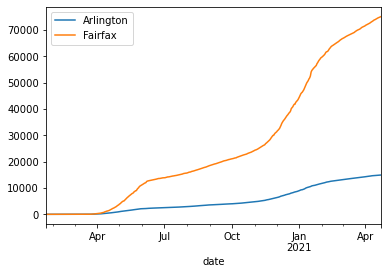

In [230]:
#7)  Provide one figure with one subplot that shows two plotted lines, 
# where each line represents the total number of cases over time 
# (from the earliest to the most recent date) for Fairfax and Arlington.

fair = df_melt[df_melt["Admin2"].isin(["Fairfax"])]
arl = df_melt[df_melt["Admin2"].isin(["Arlington"])]

fair_arl = pd.concat([fair, arl])

fair_arl['date'] = pd.to_datetime(fair_arl.date) 

fair_arl_cases = fair_arl.set_index('date')

fair_arl_cases.groupby(['Admin2'])['cases'].plot(legend = True)
#fair_arl_date.dtypes

## Part 2

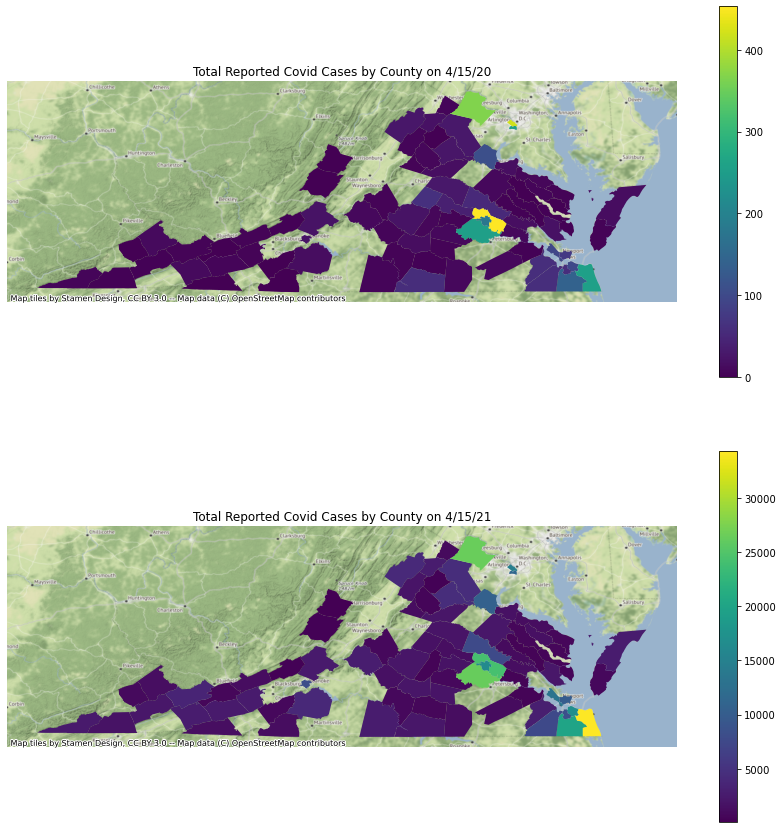

In [246]:
# 8) Choropleth map for 4/15/20 and 4/15/2021

zipfile = "zip:///Users//Admin//Downloads//counties.zip"
gdf = gpd.read_file(zipfile)


va_fips_list = va_df.loc[:,'FIPS'].to_list()


va_counties = gdf[gdf['FIPS_BEA'].isin(va_fips_list)]


va_merge = va_counties.merge(va_df, how='left', left_on='FIPS_BEA', right_on='FIPS')

figure, axes = plt.subplots(2,1)
figure.set_figheight(15)
figure.set_figwidth(15)


ax1 = va_merge.plot(column='4/15/20', ax=axes[0], legend=True)
ax2 = va_merge.plot(column='4/15/21', ax=axes[1], legend=True)


ax1.axis('off') 
ax2.axis('off')
ax1.set_title('Total Reported Covid Cases by County on 4/15/20')
ax2.set_title('Total Reported Covid Cases by County on 4/15/21')


contextily.add_basemap(ax1, crs=4269, zoom='auto')
contextily.add_basemap(ax2, crs=4269, zoom='auto')

plt.show()